# Lab 11
This week we will learn how to solve systems of DEs using matrix exponentiation and take a closer look at how the long-run behaviour of a system is decided by its eigenvalues (and eigenvectors).

## Systems of DEs the Easy Way

Last week we learnt that a function of a matrix can be written in terms of a Taylor expansion. For instance, if $A$ is a square matrix and $t$ is a scalar, we can write
\begin{align*}
\mathrm{e}^{At} = \sum_{n=0}^\infty \frac{A^nt^n}{n!},
\end{align*}
where we take $A^0$ to be the identity matrix $\mathrm{I}$.

Now $t$ is just a scalar, so if we want to take the derivative with respect to $t$ we can write
\begin{align*}
\frac{1}{\mathrm{d}t}\mathrm{e}^{At} &= \frac{1}{\mathrm{d}t}\sum_{n=0}^\infty \frac{A^nt^n}{n!}\\
&= \sum_{n=0}^\infty \frac{A^n}{n!}\frac{1}{\mathrm{d}t}t^n\\
&= \sum_{n=1}^\infty \frac{A^n}{n!}nt^{n-1}\quad\left(\text{note that }\frac{1}{\mathrm{d}t}t^0 = 0\right)\\
&= A\sum_{n=1}^\infty \frac{A^{n-1}}{(n-1)!}t^{n-1}\\
&= A\sum_{n=0}^\infty \frac{A^nt^n}{n!}\\
&= A\mathrm{e}^{At}.
\end{align*}

Now, if we have a vector function $\mathbf{x(t)}=\mathrm{e}^{At}\mathbf{a}$ for vector $\mathbf{a}$, we can write
\begin{align*}
\mathbf{x}'(t) &= \frac{1}{\mathrm{d}t}\mathrm{e}^{At}\mathbf{a} \\
&= A\mathrm{e}^{At}\mathbf{a} \\
&= A\mathbf{x}(t).
\end{align*}

In fact for any system of differential equations
\begin{align*}
\mathbf{x}'(t) = A\mathbf{x}(t),
\end{align*}
the general solution is $\mathbf{x}(t)=\mathrm{e}^{At}\mathbf{a}$ for any vector $\mathbf{a}$.

## TL;DR

For the initial value problem
\begin{align*}
\mathbf{x}'(t) = A\mathbf{x}(t),
\end{align*}
with $\mathbf{x}(0) = \mathbf{x}_0$, the solution is 
\begin{align*}
\mathbf{x}(t)=\mathrm{e}^{At}\mathbf{x}_0.
\end{align*}
We were able to solve form $\mathbf{a}$ because $\mathbf{x}(0) = \mathrm{e}^{0}\mathbf{a} = \mathrm{I}\mathbf{a} = \mathbf{a}$.

## Example

In [1]:
import numpy as np
from scipy import integrate, linalg
import seaborn as sns
import pandas as pd

The vector $\mathbf{x}(t)$ gives the probability that a nucleotide is in a particular state (A, C, G, or T) in the human gene ENSG00000069248 at time $t$. Over the last 160 million years, $\mathbf{x}(t)$ evolved according to the equation
\begin{align*}
\mathbf{x}'(t) = 10^{-4}\left(\begin{matrix}
-4.8&  2.3&  1.1&  0.2\\
 3.1& -6.6&  1.1&  1.3\\
 1.4&  1.9& -4.1&  2.4\\
 0.3&  2.4&  1.9& -3.9\end{matrix}\right)\mathbf{x}(t),
\end{align*}
where time is in millions of years.

For your convenience, I have copied the above matrix into a NumPy array:

In [2]:
Q = np.array([[-4.8,  2.3,  1.1,  0.2],
              [ 3.1, -6.6,  1.1,  1.3],
              [ 1.4,  1.9, -4.1,  2.4],
              [ 0.3,  2.4,  1.9, -3.9]]) * 1e-4

1. Given that
\begin{align*}
\mathbf{x}_0=\left(\begin{matrix}
0.3082\\0.1822\\0.1663\\0.3433
\end{matrix}\right),
\end{align*}
160 million years ago, plot $\mathbf{x}(t)$ for the last 160 million years. Plot all four probabilities on the same graph, using markers rather than lines.

You can use `scipy.integrate.odeint` to integrate the differential equation, or use a for loop and take advantage of the knowledge that $\mathbf{x}(t) = \mathrm{e}^{Qt}\mathbf{x}_0$.

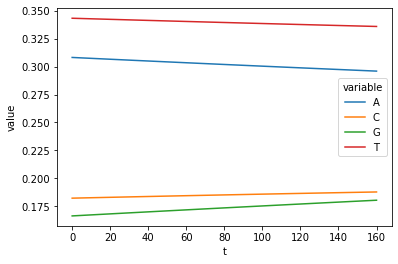

In [3]:
def difeq(x, t):
    return Q @ x

t = np.linspace(0, 160)
x0 = np.array([0.3082, 0.1822, 0.1663, 0.3433])
data = []
for _t in t:
    xt = linalg.expm(Q*_t) @ x0
    data.append(xt)
data = pd.DataFrame(data, columns=['A', 'C', 'G', 'T'])
data['t'] = t
data = data.melt(id_vars=['t'])
ax = sns.lineplot(data=data, x='t', y='value', hue='variable')

2. The solution to the equation above takes the form
\begin{align*}
\mathbf{x}_t=a_1\mathrm{e}^{\lambda_1 t}\mathbf{v}_1 + a_2\mathrm{e}^{\lambda_2 t}\mathbf{v}_2 + a_3\mathrm{e}^{\lambda_3 t}\mathbf{v}_3 + a_4\mathrm{e}^{\lambda_4 t}\mathbf{v}_4,
\end{align*}
where $\lambda_i$ and $v_i$ are the eigenvalues and eigenvectors of $Q$ and $a_i$ are scalars. Find the values of $a_i$ for the initial conditions ($x_0$) given in question 1.

In [4]:
w, V = np.linalg.eig(Q)
a = np.linalg.solve(V, x0)

3. Use the formula from Question 2 to write a function that returns values of $x_t$ given an array of times, the $a_i$ coefficients, the eigenvalues, and the eigenvectors. The latter two should be in the form as returned by `numpy.linalg.eig`. (Hint: you can do it in one line if you use `numpy.diag` and `numpy.outer`, but a for loop is easier.)

In [5]:
def calc_x(t, a, lam, V):
    return V @ np.diag(a) @ np.exp(np.outer(lam, t))

In [6]:
lam, v = np.linalg.eig(Q)
a = np.linalg.solve(v, x0)
assert np.allclose(calc_x(np.arange(5), a, lam, v),
                   np.array([[0.3082    , 0.30811916, 0.30803837, 0.30795764, 0.30787697],
                             [0.1822    , 0.18223819, 0.18227633, 0.18231443, 0.18235248],
                             [0.1663    , 0.16639195, 0.16648384, 0.16657568, 0.16666747],
                             [0.3433    , 0.34325071, 0.34320145, 0.34315225, 0.34310308]]))
print('good work!')

good work!


4. Recreate your plot from Question 1 using your formula.

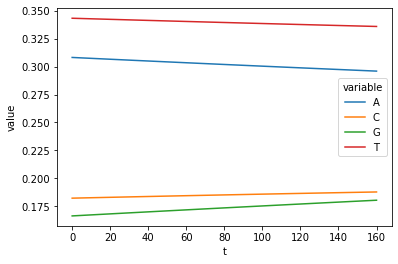

In [7]:
xt = calc_x(t, a, w, V).T
data = pd.DataFrame(data=xt, columns=list('ACGT'))
data['t'] = t
data = data.melt(id_vars=['t'])
ax = sns.lineplot(data=data, x='t', y='value', hue='variable')

5. Use your formula to extend the plot out to ten billion years ($t=10000$).

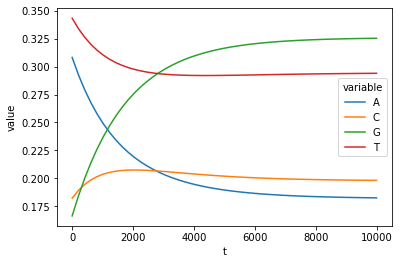

In [8]:
t = np.linspace(0, 10000)
xt = calc_x(t, a, w, V).T
data = pd.DataFrame(data=xt, columns=list('ACGT'))
data['t'] = t
data = data.melt(id_vars=['t'])
ax = sns.lineplot(data=data, x='t', y='value', hue='variable')

6. Look for the eigenvalue of $Q$ that is zero and find the corresponding eigenvector. Also find the corresponding parameter $a_i$. Calculate the appropriate $a_i\mathbf{v}_i$. What are the limiting values of $x$ for large $t$? Do they agree with your plot for Question 5?

In [9]:
i = np.isclose(w, 0)
print(a[i]*V[:, i])

[[0.18172924]
 [0.19770884]
 [0.32606405]
 [0.29449787]]
